# INTRODUCERE

RNA este o abreviere pentru Rețea Neurală Artificială (RNA), un concept fundamental din domeniul învățării automate și al inteligenței artificiale. Rețelele neurale artificiale sunt inspirate de modul în care creierul uman procesează și învață informații, folosind o rețea de neuroni interconectați.

În esență, o RNA este un model matematic complex, format dintr-o serie de noduri numite neuroni, organizate în straturi și conectate printr-o rețea de ponderi. Aceste rețele sunt antrenate pentru a recunoaște modele în datele de intrare și pentru a face predicții sau decizii în funcție de acestea.

Modul în care funcționează o RNA este prin procesul de antrenare, care constă în ajustarea ponderilor dintre neuroni pentru a minimiza o funcție de pierdere sau o eroare.

## Vizualizarea și curățarea datelor

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

In [9]:
df = pd.read_csv(r'C:\Users\Admin\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Exploratory Data Analisys

Verificarea prezentei valorilor nule

In [12]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Absența valorilor lipsă într-un set de date este considerată un aspect pozitiv pentru analiză, deoarece contribuie la integritatea, precizia, performanța și eficiența procesului de analiză, crescând încrederea în rezultatele obținute.

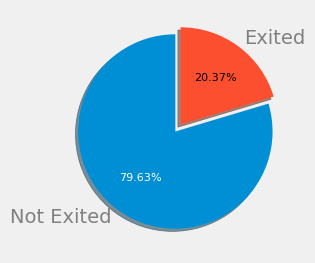

In [13]:
values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

Se observă o distribuție neechilibrată între numărul de persoane care renunță și care nu. Respectiv va fi o dezechilibru de clasă. Aceasta înseamnă că modelul va fi predispus să prezică în mod incorect mai puțini clienți ca "Exited", deoarece există mai puține exemple pentru această clasă. Pentru a gestiona acest dezechilibru, este posibil să fie necesare tehnici specifice, cum ar fi suprasamplarea (oversampling) sau sub-samplarea (undersampling), sau folosirea unor metrici de evaluare a performanței care iau în considerare dezechilibrul de clasă, precum AUC-ROC sau matricea de confuzie ajustată. Din păcate nu am reușit să le aplic și va rămâne acest domeniu ca studiu de caz pe viitor.

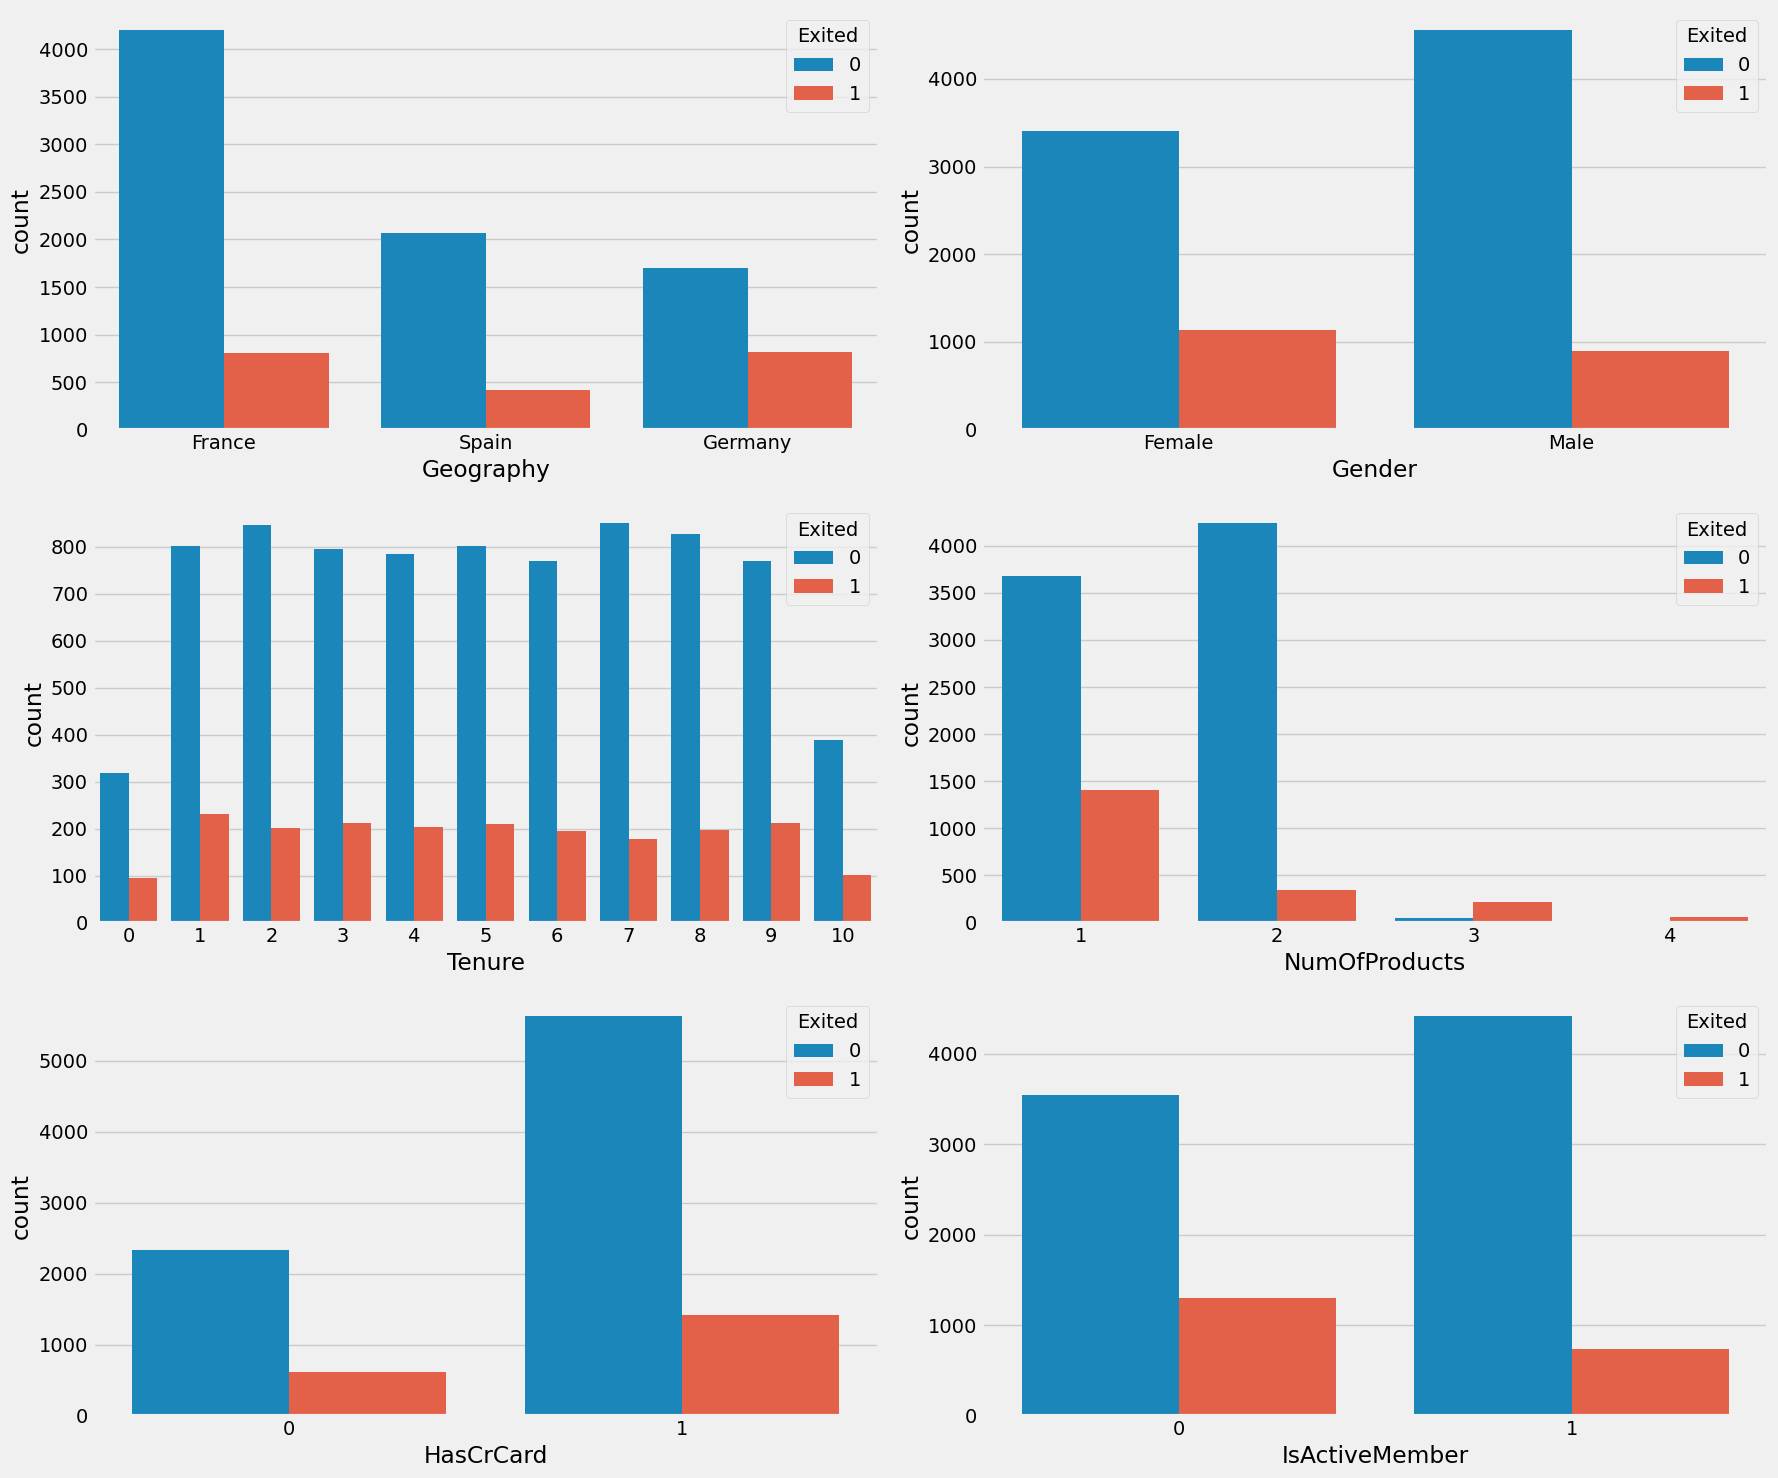

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 2, figsize=(18, 15))

sns.countplot(x='Geography', hue='Exited', data=df, ax=ax[0][0])
sns.countplot(x='Gender', hue='Exited', data=df, ax=ax[0][1])
sns.countplot(x='Tenure', hue='Exited', data=df, ax=ax[1][0])
sns.countplot(x='NumOfProducts', hue='Exited', data=df, ax=ax[1][1])
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=ax[2][0])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=ax[2][1])

plt.tight_layout()
plt.show()


In [17]:
# Compute counts of exited persons based on different categorical variables
geography_counts = df.groupby('Geography')['Exited'].value_counts().unstack().fillna(0).astype(int)
gender_counts = df.groupby('Gender')['Exited'].value_counts().unstack().fillna(0).astype(int)
tenure_counts = df.groupby('Tenure')['Exited'].value_counts().unstack().fillna(0).astype(int)
num_of_products_counts = df.groupby('NumOfProducts')['Exited'].value_counts().unstack().fillna(0).astype(int)
has_cr_card_counts = df.groupby('HasCrCard')['Exited'].value_counts().unstack().fillna(0).astype(int)
is_active_member_counts = df.groupby('IsActiveMember')['Exited'].value_counts().unstack().fillna(0).astype(int)

# Print the counts
print("Exited Persons Count by Geography:")
print(geography_counts)
print("\nExited Persons Count by Gender:")
print(gender_counts)
print("\nExited Persons Count by Tenure:")
print(tenure_counts)
print("\nExited Persons Count by Number of Products:")
print(num_of_products_counts)
print("\nExited Persons Count by Has Credit Card:")
print(has_cr_card_counts)
print("\nExited Persons Count by Active Membership:")
print(is_active_member_counts)


Exited Persons Count by Geography:
Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413

Exited Persons Count by Gender:
Exited     0     1
Gender            
Female  3404  1139
Male    4559   898

Exited Persons Count by Tenure:
Exited    0    1
Tenure          
0       318   95
1       803  232
2       847  201
3       796  213
4       786  203
5       803  209
6       771  196
7       851  177
8       828  197
9       771  213
10      389  101

Exited Persons Count by Number of Products:
Exited            0     1
NumOfProducts            
1              3675  1409
2              4242   348
3                46   220
4                 0    60

Exited Persons Count by Has Credit Card:
Exited        0     1
HasCrCard            
0          2332   613
1          5631  1424

Exited Persons Count by Active Membership:
Exited             0     1
IsActiveMember            
0               3547  1302
1               4416   735


## Rezultă că...
- Majoritatea clienților sunt din Franța, dar cei mai mulți clienți care au renunțat sunt din Germania, poate din cauza lipsei de resurse, deoarece nu sunt mulți clienți.
- De asemenea, proporția de clienți de sex feminin care renunță la servicii este mai mare decât cea a clienților de sex masculin.
- Majoritatea clienților au o vechime cuprinsă între 1 și 9 ani, iar rata de retragere este, de asemenea, ridicată între aceste vechimi.
- Majoritatea clienților au 1 sau 2 produse, iar majoritatea clienților care au renunțat au un singur produs, poate că nu sunt mulțumiți și de aceea renunță.
- Este interesant faptul că majoritatea clienților care au renunțat la produse sunt cei care au carduri de credit, dar acest lucru poate fi o coincidență, deoarece majoritatea clienților au carduri de credit.
- Nu este surprinzător faptul că membrii inactivi au o rată de dezabonare mai mare, iar proporția totală de membri inactivi este, de asemenea, foarte mare.

**Vizualizarea variabilelor continue**

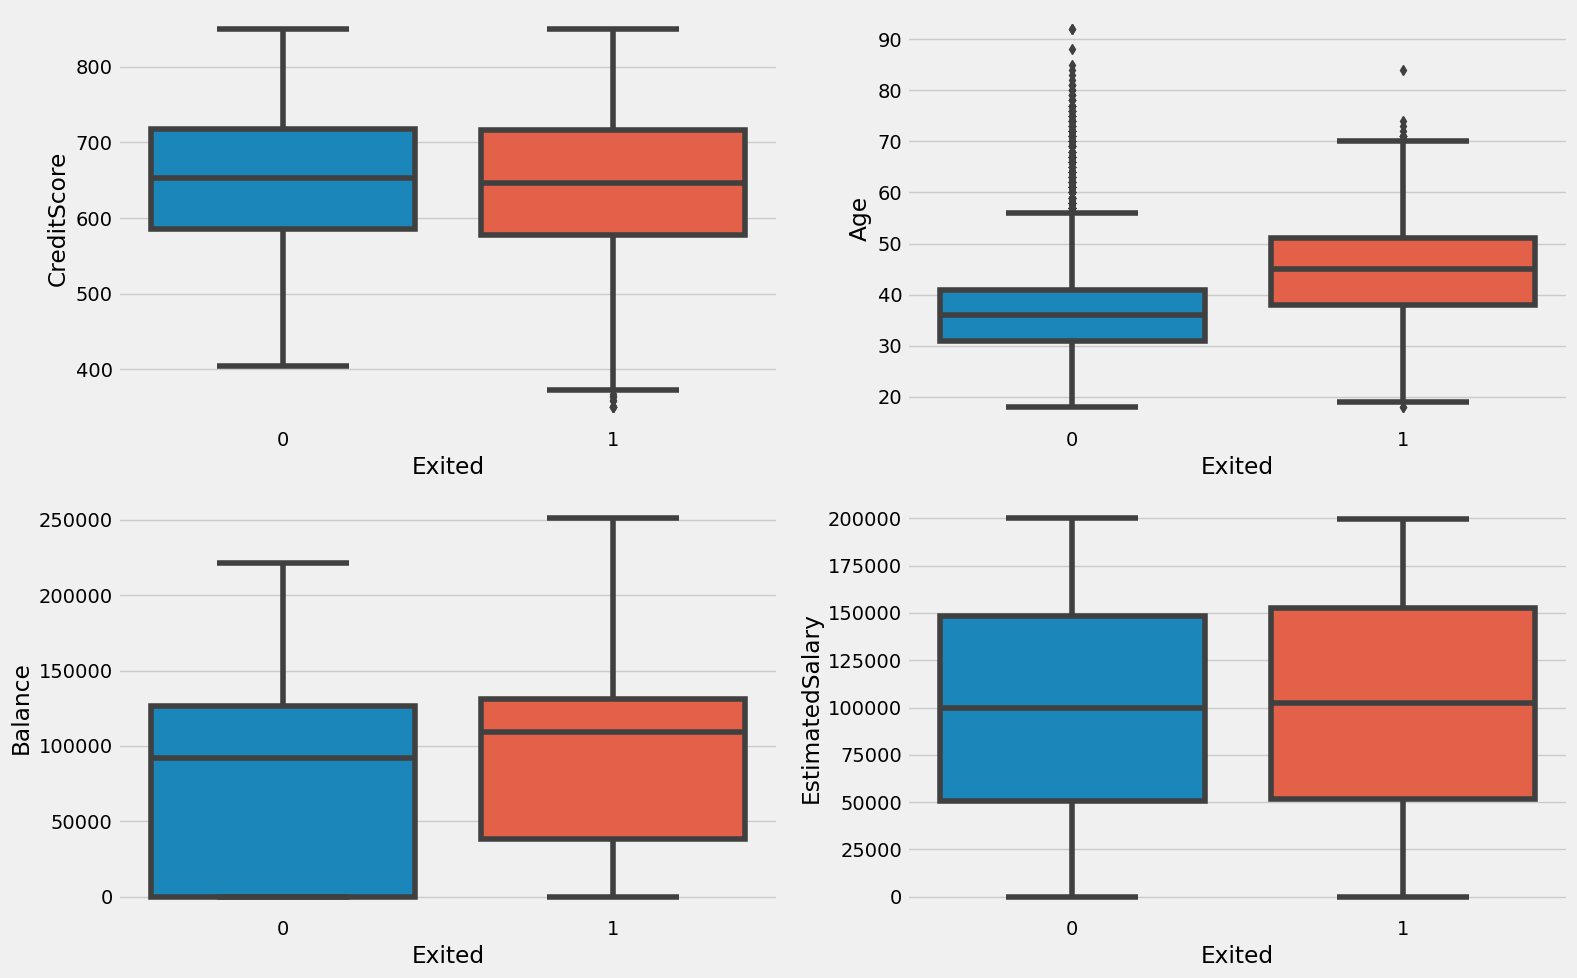

In [18]:
fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][1])

plt.tight_layout()
plt.show()

## Rezultă că...
- Nu există nicio diferență semnificativă în ceea ce privește distribuția scorului de credit între clienții care sunt sau nu rechemați.
- Clienții mai în vârstă sunt mai mult decât cei mai tineri.
- Banca pierde clienți cu un sold bancar semnificativ.
- Salariul estimat nu are o influență semnificativă asupra probabilității de dezabonare.
- Este interesant faptul că majoritatea clienților care au renunțat la serviciile bancare sunt cei care au carduri de credit, dar acest lucru poate fi o coincidență, deoarece majoritatea clienților au carduri de credit.
- Nu este surprinzător faptul că membrii inactivi au o rată de dezabonare mai mare, iar proporția totală de membri inactivi este, de asemenea, foarte mare.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

https://data36.com/correlation-definition-calculation-corr-pandas/

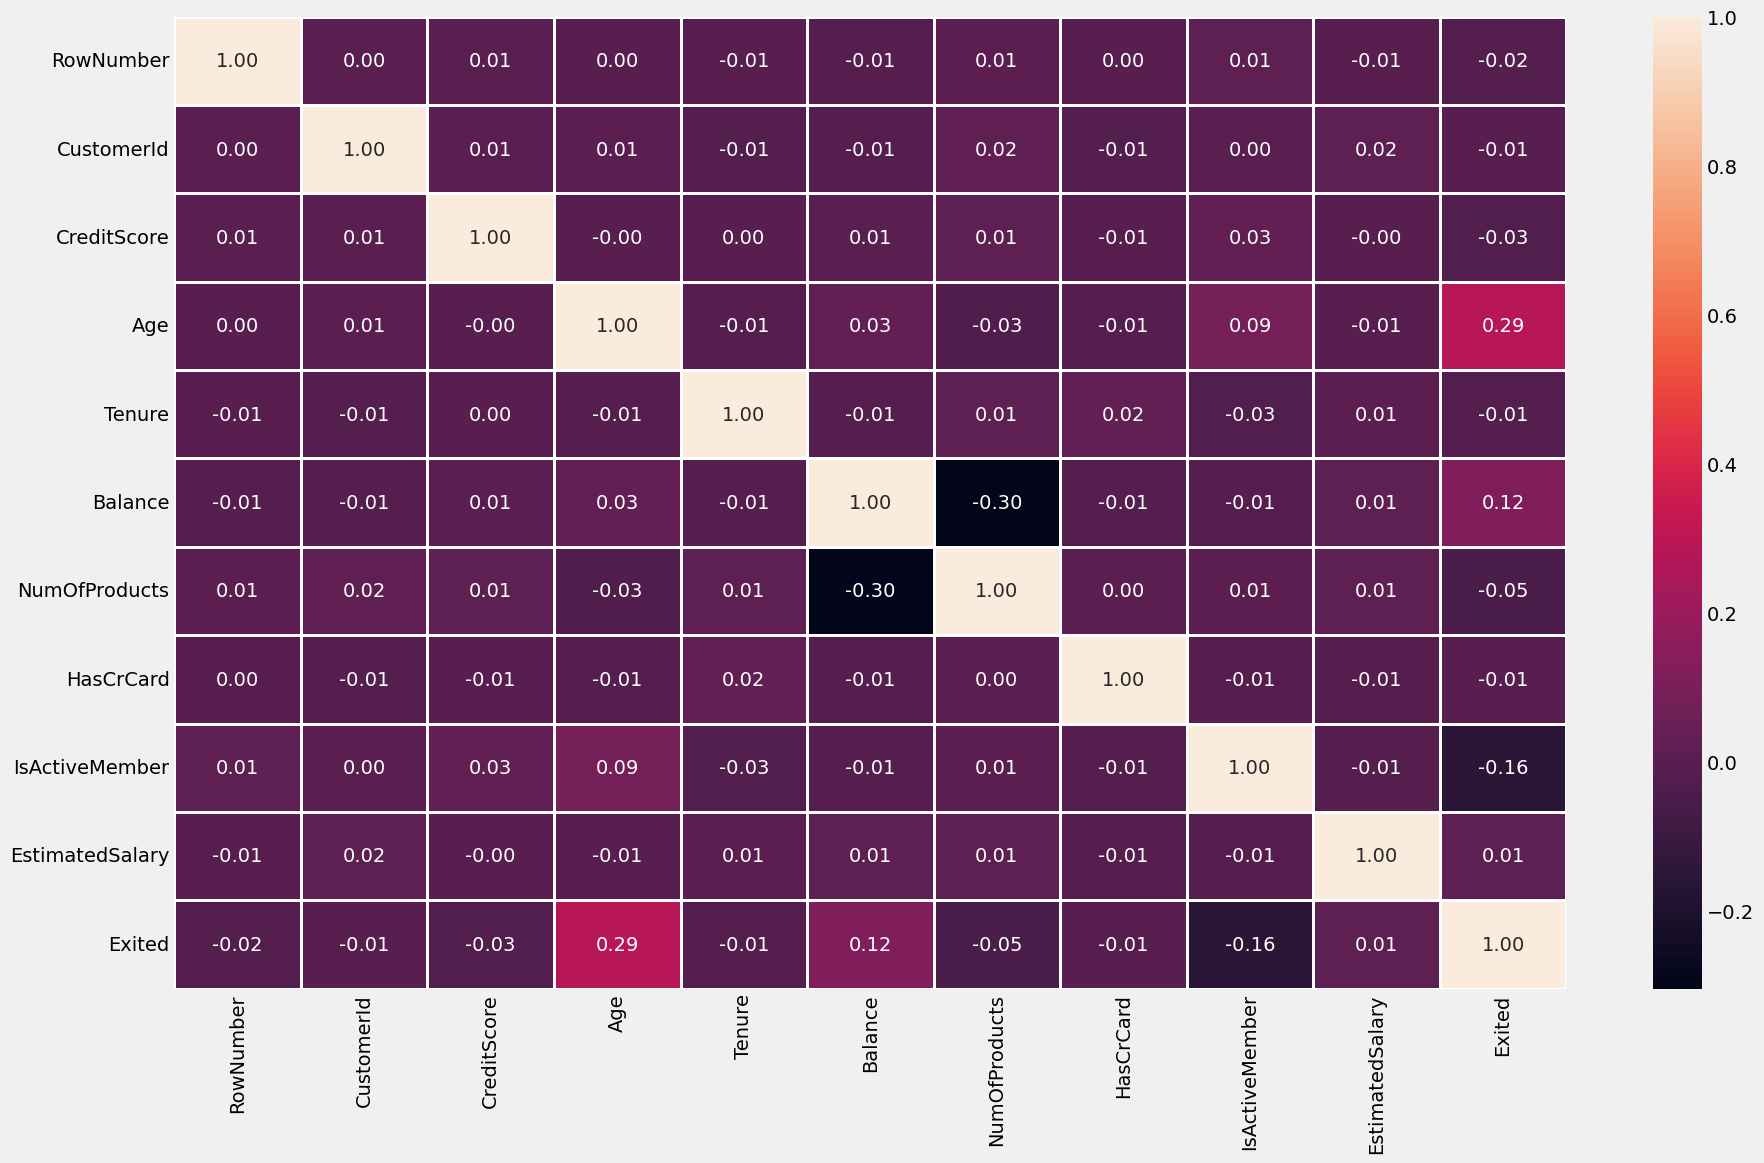

In [21]:
# heatmap 
# Explorarea corelațiilor dintre variabilile continue
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(20, 12))
corr = numeric_df.corr()

sns.heatmap(corr, linewidths=1, annot=True, fmt=".2f")
plt.show()

Putem spune că nu există multicolinearitate în date.

Ștergerea datelor irelevante.

In [24]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Această ieșire arată că în DataFrame există 5014 de clienți din Franța, 4998 de clienți din Germania și 4988 de clienți din Spania.

S-au înlocuit datele ce conțin text cu valori numerice.

In [26]:
df['Geography'] = df['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

In [27]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


## Crearea caracteristicilor și etichetelor

In [28]:
from tensorflow.keras.utils import to_categorical

X = df.drop('Exited', axis = 1)
y = to_categorical(df.Exited)

Funcția to_categorical() din TensorFlow este folosită pentru a transforma coloana 'Exited' într-un format one-hot encoding (0 sau 1), astfel încât să poată fi folosită ca etichete pentru clasificare.

https://www.geeksforgeeks.org/python-keras-keras-utils-to_categorical/

**Împărțirea datelor în set de antrenament și set de testare**

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

**Scalarea datelor**

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Creare RNA

**Modelul SEQUENTIAL**

Modelul secvențial este o stivă liniară de straturi.

Modelul trebuie să știe la ce formă de intrare trebuie să se aștepte. Din acest motiv, primul strat dintr-un model secvențial (și numai primul, deoarece straturile următoare pot face inferența automată a formei) trebuie să primească informații despre forma intrării sale.

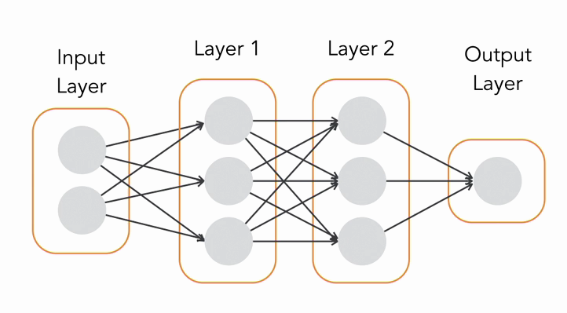

https://medium.com/@navarai/the-sequential-model-45af91ab3319#:~:text=The%20Sequential%20model%20is%20a,tensor%20and%20one%20output%20tensor.

**DENSE Layer**

Dense este un tip de strat neural care este utilizat pentru a conecta fiecare neuron din stratul anterior cu fiecare neuron din stratul curent. Acest lucru înseamnă că fiecare neuron dintr-un strat dense primește inputuri din toți neuronii stratului anterior și trimite outputuri către toți neuronii stratului următor.

https://habr.com/ru/articles/718044/

**Functia de activare RELU pentru straturile ascunse**

- Accelerarea convergenței: 'relu' elimină problema dispariției gradienților în timpul antrenării, ceea ce poate duce la o convergență mai rapidă a modelului.
- Spargerea liniarității: 'relu' oferă o non-liniaritate simplă, dar eficientă, care ajută rețeaua să învețe și să extragă caracteristici complexe din datele de intrare.

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

**Funcția de activare 'sigmoid' pentru stratul de ieșire**

- Funcția de activare 'sigmoid' este adesea folosită pentru stratul de ieșire al rețelelor neurale, în special în cazurile de clasificare binară.
- 'Sigmoid' produce ieșiri între 0 și 1, interpretate ca probabilități pentru clasele respective. Aceasta este potrivită pentru problema de clasificare binară, în care dorim să determinăm probabilitatea că un exemplu să fie asociat cu o anumită clasă (de exemplu, probabilitatea de a fi un client care renunță sau nu la servicii).
- În plus, 'sigmoid' este derivabilă și poate fi utilizată pentru calculul gradienților necesari în timpul antrenării cu algoritmi de optimizare bazată pe gradient, cum ar fi algoritmul de propagare înapoi (backpropagation).

https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

**Inițializarea ponderilor folosind o distribuție normală**

- Inițializarea ponderilor cu o distribuție normală (sau gaussiană) este o alegere obișnuită în construirea rețelelor neurale. Aceasta presupune inițializarea ponderilor cu valori aleatoare extrase dintr-o distribuție normală cu medie zero și o deviație standard specificată.
- Prin inițializarea ponderilor cu o distribuție normală, se urmărește obținerea unei convergențe mai rapide a algoritmului de antrenare și evitarea unor probleme precum explozia sau dispariția gradientului.

https://datascience.stackexchange.com/questions/37378/what-are-kernel-initializers-and-what-is-their-significance

**Dropout și Batch Normalization**

- Evitarea overfitting: Prin eliminarea aleatorie a unor neuroni în timpul antrenării, se reduce dependența excesivă între neuroni și se împiedică modelul să învețe "zgomotul" din datele de antrenament.
- Stabilizarea antrenării: Batch Normalization reduce variabilitatea în distribuția activărilor și gradienților din rețea
- Accelerarea antrenării

https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization


In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

# inițializare rna
model = Sequential()

# adăugarea primului strat de intrare cu 10 neuroni și funcția de activare ReLU și a primului strat ascuns
model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu', input_shape = (10, )))

# adăugarea normalizării batch și a stratului de abandon
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adăugând al doilea strat ascuns cu 7 neuroni și funcția de activare ReLU.
model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

# adăugarea normalizării batch și a stratului de abandon
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adăugarea stratului output cu 2 neuroni și funcția de activare sigmoid, deoarece este o problemă de clasificare binară
model.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))

# compilarea modelului
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# antrenarea modelului la setul de antrenament (training set)
model_history = model.fit(X_train, y_train, validation_split = 0.30, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
235/235 [==============================] - 5s 5ms/step - loss: 0.6061 - accuracy: 0.6948 - val_loss: 0.5492 - val_accuracy: 0.7804
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.4605 - accuracy: 0.8033 - val_loss: 0.4385 - val_accuracy: 0.8112
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.4063 - accuracy: 0.8316 - val_loss: 0.4022 - val_accuracy: 0.8292
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3866 - accuracy: 0.8437 - val_loss: 0.3808 - val_accuracy: 0.8400
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3786 - accuracy: 0.8467 - val_loss: 0.3774 - val_accuracy: 0.8408
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3827 - accuracy: 0.8443 - val_loss: 0.3786 - val_accuracy: 0.8400
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3766 - accuracy: 0.8453 - val_loss: 0.3691 - val_accuracy: 0.8444

# Vizualizarea pierderilor de antrenare și validare

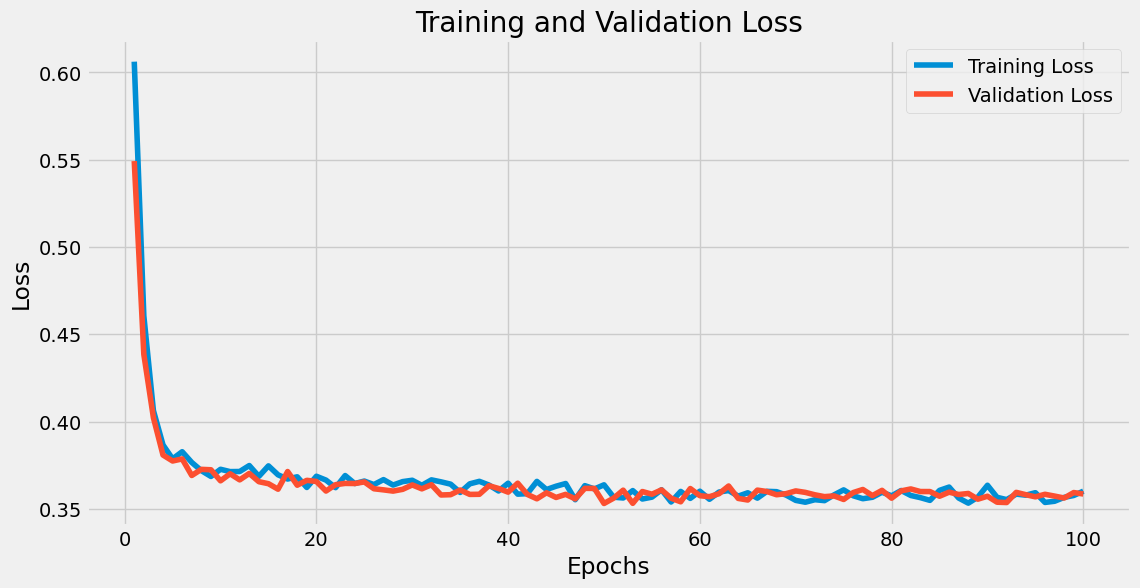

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

sns.lineplot(x=epochs, y=train_loss, label='Training Loss')
sns.lineplot(x=epochs, y=val_loss, label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Vizualizarea acurateții de antrenare și validare

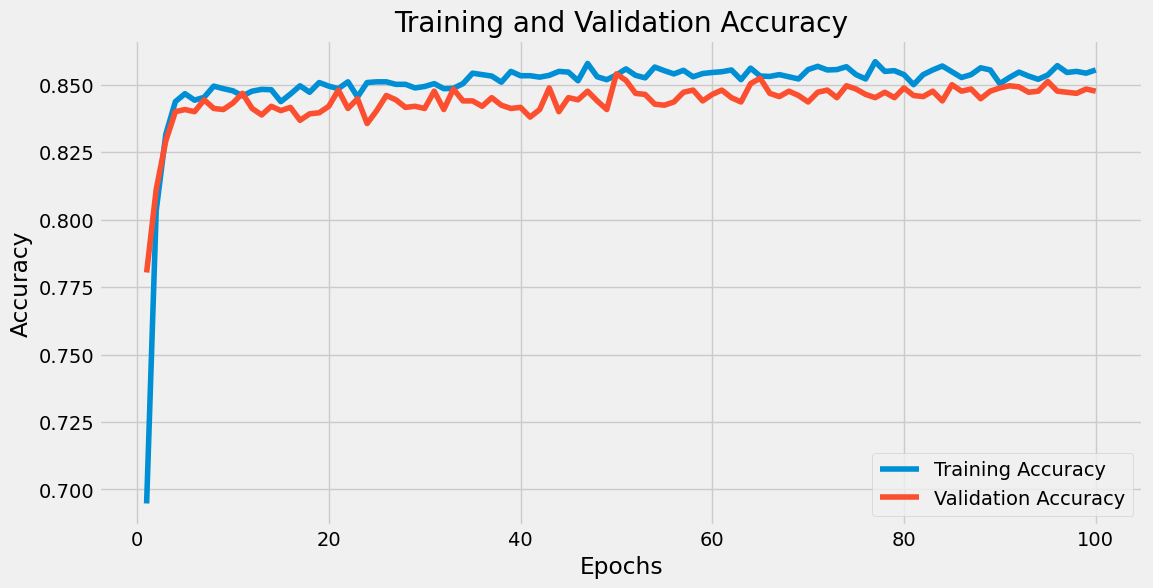

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

train_accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

sns.lineplot(x=epochs, y=train_accuracy, label='Training Accuracy')
sns.lineplot(x=epochs, y=val_accuracy, label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=['Not Exited', 'Exited'])

# Print classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

  Not Exited       0.85      0.97      0.91      1951
      Exited       0.80      0.41      0.54       549

    accuracy                           0.85      2500
   macro avg       0.83      0.69      0.73      2500
weighted avg       0.84      0.85      0.83      2500



Precizia măsoară acuratețea predicțiilor pozitive. Pentru clasa "Nu a ieșit", aceasta este de 85%, ceea ce indică faptul că 85% dintre clienții prezis ca fiind "Nu a ieșit" au fost clasificați corect. Pentru clasa "Exited", este de 80%, ceea ce înseamnă că 80% dintre clienții prezis ca fiind "Exited" au fost clasificați corect.

Recall, cunoscută și sub numele de sensibilitate, măsoară capacitatea modelului de a identifica corect clasa pozitivă. Pentru clasa "Not Exited", aceasta este de 97%, ceea ce înseamnă că 97% dintre clienții reali "Not Exited" au fost clasificați corect. Pentru clasa "Exited", este de 41%, ceea ce înseamnă că doar 41% dintre clienții reali "Exited" au fost clasificați corect.

Scorul F1 este media armonică a preciziei și a rechemării. Acesta oferă un echilibru între precizie și rechemare. Pentru clasa "Not Exited", acesta este de 91%, iar pentru clasa "Exited", de 54%.

Suportul reprezintă numărul de apariții efective ale fiecărei clase în setul de testare. Au existat 1951 cazuri de "Not Exited" și 549 de cazuri de "Exited".

Precizia măsoară corectitudinea generală a modelului. În acest caz, acuratețea este de 85%, ceea ce indică faptul că modelul a prezis corect clasa pentru 85% din cazuri.

Media macro a scorului F1 este de 73%, ceea ce indică performanța generală a modelului pentru ambele clase. Cu toate acestea, este important să se observe dezechilibrul clasei, în special în clasa "Exited", care ar putea afecta performanța modelului.

79/79 [==============================] - 0s 1ms/step


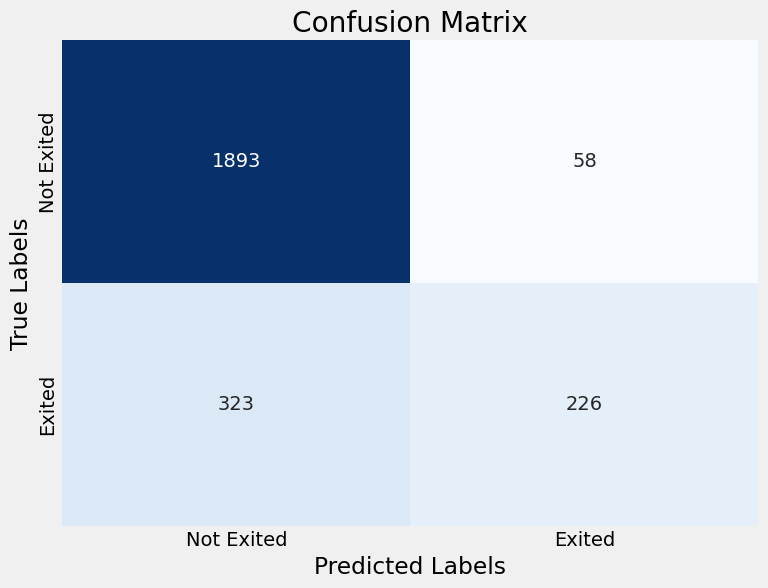

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming your model has already been trained and you have predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Pozitive adevărate (TP): 1893 - Acestea sunt cazurile care au fost corect prezise ca fiind "ieșit".

Negative adevărate (TN): 226 - Acestea sunt cazurile care au fost prezise corect ca fiind "Nu a ieșit".

False Positives (FP): 58 - Acestea sunt instanțele care au fost prezise în mod incorect ca fiind "Exited", când de fapt aparțin clasei "Not Exited".

False Negatives (FN): 323 - Acestea sunt instanțele care au fost prezise în mod incorect ca fiind "Not Exited", când de fapt aparțin clasei "Exited".

Modelul are un număr relativ mare de falsuri negative, ceea ce indică faptul că se străduiește să identifice corect clienții care sunt susceptibili de a renunța (Exited). Ar putea fi îmbunătățită performanța modelului prin concentrarea asupra reducerii numărului de falsuri negative prin ajustări ale arhitecturii modelului, ingineria caracteristicilor sau reglarea hiperparametrilor.

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 batch_normalization (Batch  (None, 10)                40        
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 batch_normalization_1 (Bat  (None, 7)                 28        
 chNormalization)                                       

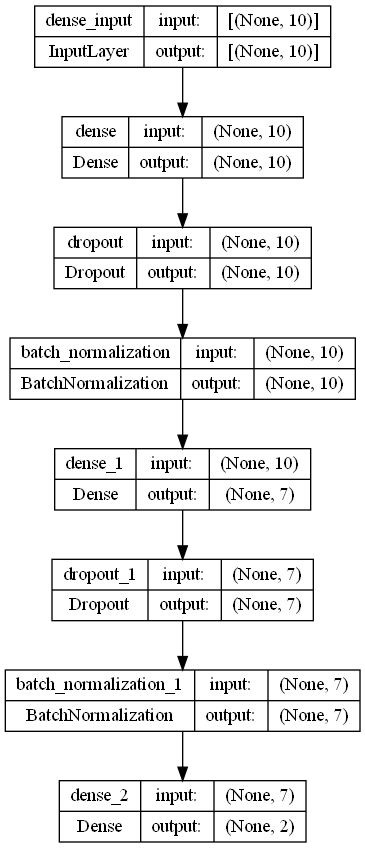

In [39]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)

# Concluzii
În acest laborator, am explorat procesul de construire și evaluare a unui model de predicție a ieșirii clienților, folosind date despre comportamentul acestora în domeniul bancar. S-a început prin explorarea și preprocesarea datelor, inclusiv vizualizarea distribuției variabilelor, eliminarea atributelor inutile și encodarea variabilelor categorice.

În continuare, s-a construit un model de rețea neuronală folosind biblioteca Keras, care să prezică probabilitatea de răspundere a clienților (Exited). S-a elucidat modul în care o RNA este construită, constând dintr-un model matematic complex format din neuroni interconectați organizati în straturi și conectați printr-o rețea de ponderi. Aceste rețele sunt antrenate pentru a recunoaște modele în datele de intrare și pentru a face predicții sau decizii în funcție de acestea, prin procesul de antrenare care implică ajustarea ponderilor pentru a minimiza o funcție de pierdere sau eroare.

S-a analizat rezultatele modelului folosind metrici precum precizia, revocarea și scorul F1, iar prin intermediul matricei de confuzie s-a examinat detaliat performanța modelului în identificarea corectă a răspunderii și a lipsei de răspundere a clienților. 

În concluzie, modelul a demonstrat o precizie și o acuratețe generală de 85%, cu un accent deosebit pe identificarea clienților care nu au părăsit serviciile bancare. Cu toate acestea, a înregistrat dificultăți în identificarea corectă a clienților care au părăsit banca, sugerând nevoia de a îmbunătăți modelul pentru a face predicții mai precise în această categorie.

Pentru a îmbunătăți performanța modelului, se pot explora mai multe direcții, cum ar fi ajustarea arhitecturii modelului, ingineria de caracteristici, gestionarea dezechilibrului de clasă și optimizarea hiperparametrilor. De asemenea, o mai bună înțelegere a factorilor care influențează rata de răspuns a clienților ar putea duce la îmbunătățiri semnificative în capacitatea modelului de a face predicții precise.